$$
\begin{eqnarray}
Y &=& K(X-E_x) + E_y \\
p(E_x \leq n) &=& \Phi(n,\sigma_x) \\
p(E_y \leq n) &=& \Phi(n,\sigma_y)
\end{eqnarray}
$$
$ E_x, E_y $ are independent

$$ K = \frac{Y-E_y}{X-E_x} $$
$$
\begin{eqnarray}
p(X-E_x > 0) \\
  &=& 1-p(X-E_x \leq 0) \\
  &=& 1-p(E_x \geq X) \\
  &=& p(E_x \leq X) \\
  &=& \Phi(X,\sigma_x)
\end{eqnarray}
$$
$$
\begin{eqnarray}
p( Y-E_y \leq (X-E_x)n | x-E_x > 0) \\
  &=& p( Y-E_y \leq (X-E_x)n ) \\
  &=& p( E_y \geq Y - (X-E_x)n ) \\
  &=& 1-\Phi(Y-(X-E_x)*n,\sigma_y)
\end{eqnarray}
$$

Solve for $ p(K \leq n) $
$$
\begin{eqnarray}
  &=& p\left( \frac{Y-E_y}{X-E_x} \leq n\right) \\
  &=& p( Y-Ey \leq (X-E_x)n | x-E_x > 0)p(X-E_x > 0) \\
    && + p( Y-E_y \geq (X-E_x)n | x-E_x < 0)p(X-E_x < 0) \\
  &=& p( Y-E_y \leq (X-E_x)n | x-E_x > 0)\Phi(X,\sigma_x) \\
    && + p( Y-E_y \geq (X-E_x)n | x-E_x < 0)(1-\Phi(X,\sigma_x)) \\
  &=& (1-\Phi(Y-(X-E_x)n,\sigma_y))\Phi(X,\sigma_x) \\
    && + \Phi(Y-(X-E_x)n,\sigma_y)(1-\Phi(X,\sigma_x)) \\
\end{eqnarray}
$$

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


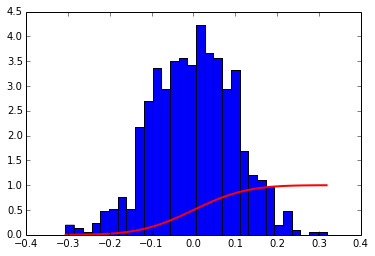

In [3]:
import matplotlib.pyplot as plt
import scipy.special as ss

# def phi(mu, sigma, n):
#     return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (n - mu)**2 / (2 * sigma**2))

def Phi(x):
    return (1+ss.erf(x / np.sqrt(2))) * 0.5 

def ph(x, sigma):
    mu = 0
    return Phi((x-mu)/sigma)

mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, ph(bins, sigma), linewidth=2, color='r')

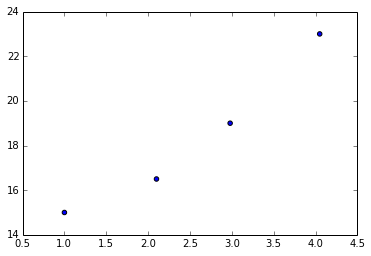

In [4]:
X = ( 1.0, 2.1, 2.98, 4.05)
Y = ( 15, 16.5, 19, 23)
sx = 1
sy = 1
plt.scatter(X, Y)

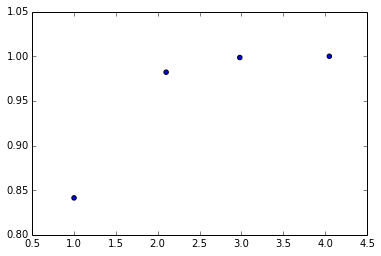

In [5]:
# Φ(X,σx)
plt.scatter(X,Phi(X))

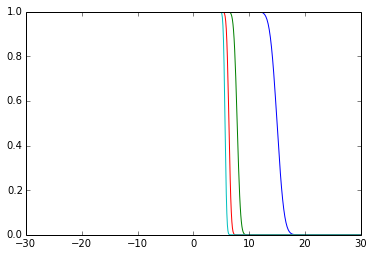

In [6]:
#(1−Φ((X−Ex)n−Y,σy))
n = arange(-30, 30, 0.1)
def f(i,n):
    return 1 - Phi(X[i]*n-Y[i])
plt.plot(n, f(0,n))
plt.plot(n, f(1,n))
plt.plot(n, f(2,n))
plt.plot(n, f(3,n))

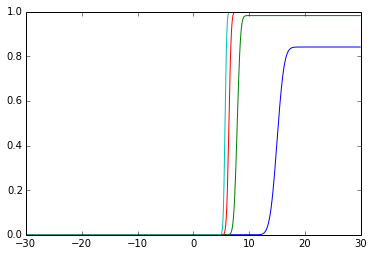

In [7]:
#(1−Φ(Y-(X−Ex)n,σy))Φ(X,σx)
n = arange(-30, 30, 0.1)
def f(i,n):
    return (1 - Phi(Y[i]-X[i]*n))*Phi(X[i])
plt.plot(n, f(0,n))
plt.plot(n, f(1,n))
plt.plot(n, f(2,n))
plt.plot(n, f(3,n))

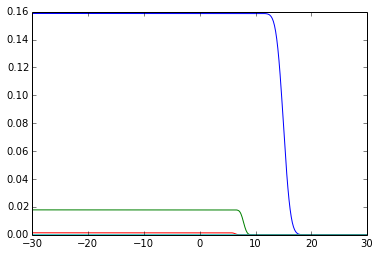

In [8]:
# Φ(Y-(X−Ex)n,σy)(1−Φ(X,σx))
n = arange(-30, 30, 0.1)
def f(i,n):
    return Phi(Y[i]-X[i]*n)*(1-Phi(X[i]))
plt.plot(n, f(0,n))
plt.plot(n, f(1,n))
plt.plot(n, f(2,n))
plt.plot(n, f(3,n))

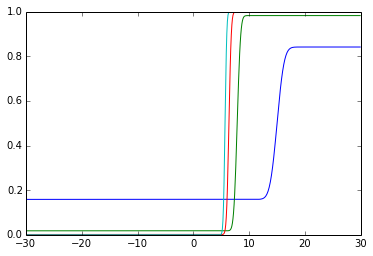

In [9]:
n = arange(-30, 30, 0.1)
def f(i,n):
    return (1 - Phi(Y[i]-X[i]*n))*Phi(X[i]) + Phi(Y[i]-X[i]*n)*(1-Phi(X[i]))
plt.plot(n, f(0,n))
plt.plot(n, f(1,n))
plt.plot(n, f(2,n))
plt.plot(n, f(3,n))

In [10]:
np.divide(Y,X)

array([ 15.        ,   7.85714286,   6.37583893,   5.67901235])

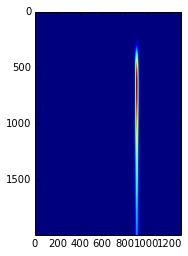

In [49]:
n = arange(-30, 100, 0.1)


def phi(mu, sigma, n):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (n - mu)**2 / (2 * sigma**2))

def f(c, sc):
    return phi(0, sc, 130-120-c) *phi(0, sc, 110-130-c) *phi(0, 1, 170-110-c)

X,Y = meshgrid(arange(-30,100,0.1), arange(1,200,0.1))
imshow(f(X,Y))

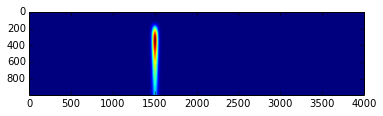

In [56]:
n = arange(-30, 100, 0.1)

def phi(mu, sigma, n):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (n - mu)**2 / (2 * sigma**2))

def f(c, sc):
    return phi(0, sc, 130-120-1*c) *phi(0, sc, 110-130-2*c) *phi(0, 1, 170-110-4*c)

X,Y = meshgrid(arange(0,40,0.01), arange(1,100,0.1))
imshow(f(X,Y))